## Installing hadoop

In [ ]:
!wget https://downloads.apache.org/hadoop/common/hadoop-3.3.0/hadoop-3.3.0.tar.gz

--2021-05-06 16:59:54--  https://downloads.apache.org/hadoop/common/hadoop-3.3.0/hadoop-3.3.0.tar.gz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.209.10, 135.181.214.104, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 500749234 (478M) [application/x-gzip]
Saving to: ‘hadoop-3.3.0.tar.gz.2’

hadoop-3.3.0.tar.gz 100%[===================>] 477.55M  23.1MB/s    in 21s     

2021-05-06 17:00:16 (22.4 MB/s) - ‘hadoop-3.3.0.tar.gz.2’ saved [500749234/500749234]



In [ ]:
!tar -xzvf hadoop-3.3.0.tar.gz

Streaming output truncated to the last 5000 lines.
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-common/target/api/org/apache/hadoop/fs/FSDataOutputStream.html
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-common/target/api/org/apache/hadoop/fs/TrashPolicyDefault.Emptier.html
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-common/target/api/org/apache/hadoop/fs/HarFileSystem.html
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-common/target/api/org/apache/hadoop/fs/PathExistsException.html
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-common/target/api/org/apache/hadoop/fs/XAttrSetFlag.html
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-

In [ ]:
#copy  hadoop file to user/local
!cp -r hadoop-3.3.0/ /usr/local/

## Configuring Hadoop's Java Home and setting environment

In [ ]:
#To find the default Java path
!readlink -f /usr/bin/java | sed "s:bin/java::"

/usr/lib/jvm/java-11-openjdk-amd64/


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"

## Running hadoop

In [ ]:
!/usr/local/hadoop-3.3.0/bin/hadoop

Usage: hadoop [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]
 or    hadoop [OPTIONS] CLASSNAME [CLASSNAME OPTIONS]
  where CLASSNAME is a user-provided Java class

  OPTIONS is none or any of:

buildpaths                       attempt to add class files from build tree
--config dir                     Hadoop config directory
--debug                          turn on shell script debug mode
--help                           usage information
hostnames list[,of,host,names]   hosts to use in slave mode
hosts filename                   list of hosts to use in slave mode
loglevel level                   set the log4j level for this command
workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

daemonlog     get/set the log level for each daemon

    Client Commands:

archive       create a Hadoop archive
checknative   check native Hadoop and compression libraries availability
classpath     prints the class path needed to get the Hadoop jar and the
    

In [ ]:
#To find the default Java path
!readlink -f /usr/bin/java | sed "s:bin/java::"

/usr/lib/jvm/java-11-openjdk-amd64/


In [ ]:
!mkdir ~/input
!cp /usr/local/hadoop-3.3.0/etc/hadoop/*.xml ~/input

mkdir: cannot create directory ‘/root/input’: File exists


In [ ]:
!ls ~/input

capacity-scheduler.xml	hdfs-rbf-site.xml  kms-acls.xml     yarn-site.xml
core-site.xml		hdfs-site.xml	   kms-site.xml
hadoop-policy.xml	httpfs-site.xml    mapred-site.xml


In [ ]:
#!/usr/local/hadoop-3.3.0/bin/hadoop jar /usr/local/hadoop-3.3.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.3.0.jar grep ~/input ~/grep_example 'allowed[.]*'

In [ ]:
!find / -name 'hadoop-streaming*.jar'

/usr/local/hadoop-3.3.0/share/hadoop/tools/sources/hadoop-streaming-3.3.0-sources.jar
/usr/local/hadoop-3.3.0/share/hadoop/tools/sources/hadoop-streaming-3.3.0-test-sources.jar
/usr/local/hadoop-3.3.0/share/hadoop/tools/lib/hadoop-streaming-3.3.0.jar
/content/hadoop-3.3.0/share/hadoop/tools/sources/hadoop-streaming-3.3.0-sources.jar
/content/hadoop-3.3.0/share/hadoop/tools/sources/hadoop-streaming-3.3.0-test-sources.jar
/content/hadoop-3.3.0/share/hadoop/tools/lib/hadoop-streaming-3.3.0.jar


## To run model.sh file 

### For n=5

In [ ]:
!sh model.sh   #to run shell file

count---------+1
2021-05-07 06:40:21,766 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [/content/centroids.txt] [] /tmp/streamjob5845468830867024026.jar tmpDir=null
2021-05-07 06:40:22,641 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2021-05-07 06:40:22,829 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2021-05-07 06:40:22,830 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2021-05-07 06:40:22,853 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2021-05-07 06:40:23,017 INFO mapred.FileInputFormat: Total input files to process : 1
2021-05-07 06:40:23,040 INFO mapreduce.JobSubmitter: number of splits:1
2021-05-07 06:40:23,350 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1322742916_0001
2021-05-07 06:40:23,350 INFO mapreduce.JobSubmitter: Executing with tokens: []
2021-05-07 06:40:23,796 INFO mapred.Loc

In [ ]:
#evaluation 

import seaborn as sb
import string
import numpy as np
import argparse
import sys
sys.argv=['']
del sys

def parse_args():
    '''Parse command line arguments'''
    parser = argparse.ArgumentParser(description="Run classification evaluation")
    
    parser.add_argument('--input', nargs='?', default='predictions.txt',help='Input File path')
    parser.add_argument('--output', nargs='?', default='performance.png',help='Visualization plot name')
    
    return parser.parse_args()

def get_performance(args):
    fp = open(args.input,'r')

    # Processing alphabets and preparing confusion matrix
    cm = np.zeros((26, 26))
    alphabets = string.ascii_uppercase[:26]
    alphabet_dict = dict()
    x_axis_labels = []
    y_axis_labels = []
    for i in range(26):
        x_axis_labels.append(alphabets[i])
        y_axis_labels.append(alphabets[i])
        alphabet_dict[alphabets[i]] = i

    # Filling up the confusion matrix
    for i,line in enumerate(fp):
        line_split = line.split('\t')[0].split(',')
        actual = line_split[0]
        predictions = list(line_split[1:])
        total_pred = len(predictions)
        for p in predictions:
          cm[alphabet_dict[actual]][alphabet_dict[p]] += 1.0

    fp.close()

    # Calculate accuracy with total sum of the array and trace of the array
    print('Classification Accuracy: ' + str((np.trace(cm)/np.sum(cm))*100) + '%')
    print(cm)
    
    np.seterr(divide='ignore', invalid='ignore')
    cm = np.true_divide(cm, cm.sum(axis=1, keepdims=True))
    cm[np.isnan(cm)] = 0

    # Get heatmap of the confusion matrix
    ax = sb.heatmap(cm, vmin=0, vmax=1, xticklabels=x_axis_labels, yticklabels=y_axis_labels).set_title('Confusion matrix')
    fig = ax.get_figure()
    fig.savefig(args.output)

Classification Accuracy: 25.27974783293932%
[[478.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  10.   7.   0.
    0.   0.   1.   0.   5.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 81.  89.   0. 130.  49.  46.   7.  43.  49.  60.  57.  65.  48.  52.
    9.  69.  34. 110.  80.   0.   0.   0.   0.  51.   0.  60.]
 [  0.  64. 277.  64. 281.   5.  57.  55.  45.  43.  73. 113.   2.   8.
    0.   3.   0.  43. 144.   0.   0.   0.   0.  81.   0. 296.]
 [  0.   0.  10.   0.   0. 447.   0.   1.   1.   1.   0.   0.   0.   2.
    0. 325.   0.   0.   1. 176.   5.  47.   1.   3.  99.   1.]
 [ 39.  41.  69.  42.  34.   0.  94.  54.  50.   0.  51.   0.   0.  30.
   88.  37.  94.  65.   0.   0.   0.   0.   0.  34.   0.   0.]
 [  0.   0.

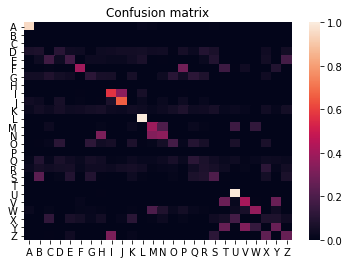

In [ ]:
if __name__ == "__main__":
    args = parse_args()
    get_performance(args)



### For n=10

In [ ]:
!sh model.sh

count---------+1
2021-05-07 06:50:14,710 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [/content/centroids.txt] [] /tmp/streamjob7030966371820598740.jar tmpDir=null
2021-05-07 06:50:15,526 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2021-05-07 06:50:15,686 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2021-05-07 06:50:15,686 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2021-05-07 06:50:15,710 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2021-05-07 06:50:15,878 INFO mapred.FileInputFormat: Total input files to process : 1
2021-05-07 06:50:15,899 INFO mapreduce.JobSubmitter: number of splits:1
2021-05-07 06:50:16,265 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1979508688_0001
2021-05-07 06:50:16,265 INFO mapreduce.JobSubmitter: Executing with tokens: []
2021-05-07 06:50:16,734 INFO mapred.Loc

In [ ]:
#evaluation 

import seaborn as sb
import string
import numpy as np
import argparse
import sys
sys.argv=['']
del sys

def parse_args():
    '''Parse command line arguments'''
    parser = argparse.ArgumentParser(description="Run classification evaluation")
    
    parser.add_argument('--input', nargs='?', default='predictions.txt',help='Input File path')
    parser.add_argument('--output', nargs='?', default='performance.png',help='Visualization plot name')
    
    return parser.parse_args()

def get_performance(args):
    fp = open(args.input,'r')

    # Processing alphabets and preparing confusion matrix
    cm = np.zeros((26, 26))
    alphabets = string.ascii_uppercase[:26]
    alphabet_dict = dict()
    x_axis_labels = []
    y_axis_labels = []
    for i in range(26):
        x_axis_labels.append(alphabets[i])
        y_axis_labels.append(alphabets[i])
        alphabet_dict[alphabets[i]] = i

    # Filling up the confusion matrix
    for i,line in enumerate(fp):
        line_split = line.split('\t')[0].split(',')
        actual = line_split[0]
        predictions = list(line_split[1:])
        total_pred = len(predictions)
        for p in predictions:
          cm[alphabet_dict[actual]][alphabet_dict[p]] += 1.0

    fp.close()

    # Calculate accuracy with total sum of the array and trace of the array
    print('Classification Accuracy: ' + str((np.trace(cm)/np.sum(cm))*100) + '%')
    print(cm)
    
    np.seterr(divide='ignore', invalid='ignore')
    cm = np.true_divide(cm, cm.sum(axis=1, keepdims=True))
    cm[np.isnan(cm)] = 0

    # Get heatmap of the confusion matrix
    ax = sb.heatmap(cm, vmin=0, vmax=1, xticklabels=x_axis_labels, yticklabels=y_axis_labels).set_title('Confusion matrix')
    fig = ax.get_figure()
    fig.savefig(args.output)

Classification Accuracy: 28.10204870506378%
[[422.   0.   0.   1.   0.   0.   1.   1.   0.  27.   1.  14.   2.   3.
    0.   0.   2.   0.   3.   0.   0.   0.   0.   0.   0.   8.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 321.   0. 149.   0.  55.   1.   4.   0.  19.   1.   0.   1.
    0.   0.   0.   0.   1.   0.   2.   0.   0.   0.   0.   1.]
 [ 43.  30.   0.  54.   0.   0.  32.  39.  48.   0.  31.   0.  44.  63.
   82.  14.  81.  58.   0.   0.  17.   0.  20.  31.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 15.  11.  34.  20.  13. 236.   8.  32.  22.  15.  16.   1.   2.  91.
    1. 156.   0.   7.  21. 189. 104. 126.   2.  16. 171.   9.]
 [  0. 125.  15. 129. 134.   4. 138. 114.  15.   3. 106.  31.   1.  10.
   63.   5.  37. 111.  79.   3.  45.   0.   0. 107.   0.  72.]
 [  0.   0.

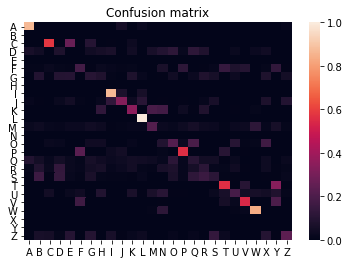

In [ ]:
if __name__ == "__main__":
    args = parse_args()
    get_performance(args)



### For n=25

In [ ]:
!sh model.sh

count---------+1
2021-05-07 07:48:13,263 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [/content/centroids.txt] [] /tmp/streamjob6487055911722700774.jar tmpDir=null
2021-05-07 07:48:14,127 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2021-05-07 07:48:14,263 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2021-05-07 07:48:14,263 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2021-05-07 07:48:14,295 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2021-05-07 07:48:14,430 INFO mapred.FileInputFormat: Total input files to process : 1
2021-05-07 07:48:14,451 INFO mapreduce.JobSubmitter: number of splits:1
2021-05-07 07:48:14,769 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1091870309_0001
2021-05-07 07:48:14,769 INFO mapreduce.JobSubmitter: Executing with tokens: []
2021-05-07 07:48:15,196 INFO mapred.Loc

In [ ]:
#evaluation 

import seaborn as sb
import string
import numpy as np
import argparse
import sys
sys.argv=['']
del sys

def parse_args():
    '''Parse command line arguments'''
    parser = argparse.ArgumentParser(description="Run classification evaluation")
    
    parser.add_argument('--input', nargs='?', default='predictions.txt',help='Input File path')
    parser.add_argument('--output', nargs='?', default='performance.png',help='Visualization plot name')
    
    return parser.parse_args()

def get_performance(args):
    fp = open(args.input,'r')

    # Processing alphabets and preparing confusion matrix
    cm = np.zeros((26, 26))
    alphabets = string.ascii_uppercase[:26]
    alphabet_dict = dict()
    x_axis_labels = []
    y_axis_labels = []
    for i in range(26):
        x_axis_labels.append(alphabets[i])
        y_axis_labels.append(alphabets[i])
        alphabet_dict[alphabets[i]] = i

    # Filling up the confusion matrix
    for i,line in enumerate(fp):
        line_split = line.split('\t')[0].split(',')
        actual = line_split[0]
        predictions = list(line_split[1:])
        total_pred = len(predictions)
        for p in predictions:
          cm[alphabet_dict[actual]][alphabet_dict[p]] += 1.0

    fp.close()

    # Calculate accuracy with total sum of the array and trace of the array
    print('Classification Accuracy: ' + str((np.trace(cm)/np.sum(cm))*100) + '%')
    print(cm)
    
    np.seterr(divide='ignore', invalid='ignore')
    cm = np.true_divide(cm, cm.sum(axis=1, keepdims=True))
    cm[np.isnan(cm)] = 0

    # Get heatmap of the confusion matrix
    ax = sb.heatmap(cm, vmin=0, vmax=1, xticklabels=x_axis_labels, yticklabels=y_axis_labels).set_title('Confusion matrix')
    fig = ax.get_figure()
    fig.savefig(args.output)

Classification Accuracy: 27.17544534153531%
[[392.   0.   0.   0.   0.   0.   0.   0.   0. 121.   0.  12.   7.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 148.   2.  55.  46.   3.  67.   7.   2.   4.   5.  17.   0.   0.
   41.   9.  52. 108. 103.   2.   0.   0.   0.  14.   0.  29.]
 [  0.   0. 228.   0. 133.   0.  36.   0.   3.   0.   9.   2.   0.   0.
    0.   0.   0.   0.  10.   0.   0.   0.   0.   0.   0.   8.]
 [ 17.  67.   0. 158.   9.   8.   1.  62.  20.  26.  18.  15.  57.  69.
   13.  28.   3.  74.  22.   0.  11.   0.   0.  46.   3.  13.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  43.   0.  27. 152.   0.   9.   0.   0.  20.   0.   0.   0.
    0.  75.   0.   0.  15.  92.  77.   2.   0.  17.  70.   3.]
 [ 35.  63.  53.  55.  50.   0.  61.  22.  44.   0.  48.   0.   1.   2.
   61.  31.  43.  66.  29.   0.   3.   0.   0.  61.   0.  49.]
 [  0.   0.

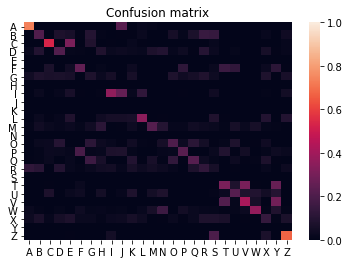

In [ ]:
if __name__ == "__main__":
    args = parse_args()
    get_performance(args)



### For n=40

In [ ]:
!sh model.sh

count---------+1
2021-05-07 08:36:59,184 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [/content/centroids.txt] [] /tmp/streamjob11225168224082914421.jar tmpDir=null
2021-05-07 08:37:00,064 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2021-05-07 08:37:00,231 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2021-05-07 08:37:00,232 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2021-05-07 08:37:00,257 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2021-05-07 08:37:00,447 INFO mapred.FileInputFormat: Total input files to process : 1
2021-05-07 08:37:00,488 INFO mapreduce.JobSubmitter: number of splits:1
2021-05-07 08:37:00,840 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1593543342_0001
2021-05-07 08:37:00,840 INFO mapreduce.JobSubmitter: Executing with tokens: []
2021-05-07 08:37:01,286 INFO mapred.Lo

In [ ]:
#evaluation 

import seaborn as sb
import string
import numpy as np
import argparse
import sys
sys.argv=['']
del sys

def parse_args():
    '''Parse command line arguments'''
    parser = argparse.ArgumentParser(description="Run classification evaluation")
    
    parser.add_argument('--input', nargs='?', default='predictions.txt',help='Input File path')
    parser.add_argument('--output', nargs='?', default='performance.png',help='Visualization plot name')
    
    return parser.parse_args()

def get_performance(args):
    fp = open(args.input,'r')

    # Processing alphabets and preparing confusion matrix
    cm = np.zeros((26, 26))
    alphabets = string.ascii_uppercase[:26]
    alphabet_dict = dict()
    x_axis_labels = []
    y_axis_labels = []
    for i in range(26):
        x_axis_labels.append(alphabets[i])
        y_axis_labels.append(alphabets[i])
        alphabet_dict[alphabets[i]] = i

    # Filling up the confusion matrix
    for i,line in enumerate(fp):
        line_split = line.split('\t')[0].split(',')
        actual = line_split[0]
        predictions = list(line_split[1:])
        total_pred = len(predictions)
        for p in predictions:
          cm[alphabet_dict[actual]][alphabet_dict[p]] += 1.0

    fp.close()

    # Calculate accuracy with total sum of the array and trace of the array
    print('Classification Accuracy: ' + str((np.trace(cm)/np.sum(cm))*100) + '%')
    print(cm)
    
    np.seterr(divide='ignore', invalid='ignore')
    cm = np.true_divide(cm, cm.sum(axis=1, keepdims=True))
    cm[np.isnan(cm)] = 0

    # Get heatmap of the confusion matrix
    ax = sb.heatmap(cm, vmin=0, vmax=1, xticklabels=x_axis_labels, yticklabels=y_axis_labels).set_title('Confusion matrix')
    fig = ax.get_figure()
    fig.savefig(args.output)

Classification Accuracy: 28.030980041703902%
[[352.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  12.   2.   0.
    0.   0.   2.   0.   9.   0.   0.   0.   0.   0.   0.   4.]
 [  9. 143.  12. 120.  20.   8.  49.  36.  24.  36.  23.  27.   0.  32.
  134.  14. 106. 107.  54.  18.  37.   0.   0.  46.   3.  53.]
 [  0.   0. 165.   0.   7.   2.  76.   9.   1.  14.  96.   0.   3.   2.
   10.   0.   3.   1.   0.   0.  47.   0.   0.   0.   0.   0.]
 [ 35. 153.   1. 187.  11.   0.  64.  41.   0.   1.  17.  20.  11.  18.
  114.   7.  76.  94.  43.   2.   7.   0.   2.  15.   0.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  2.  27.  52.  16.  77.   1. 130.  12.  55.  16.  51.  98.   1.   5.
   90.   1.  59.  69.  65.   2.   3.   0.   0.  62.   0.  48.]
 [  0.   0

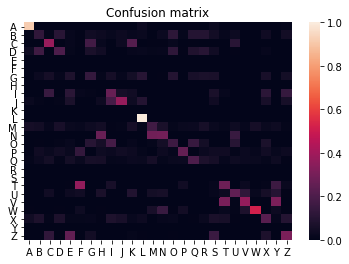

In [ ]:
if __name__ == "__main__":
    args = parse_args()
    get_performance(args)

